<a href="https://colab.research.google.com/github/rivkms/2021_sw_exam/blob/main/8%EC%A3%BC%EC%B0%A8_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN(%EA%B3%BC%EC%A0%9C%EC%98%88%EC%8B%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 문제 해결 과정
#### 문제 정의 -> 데이터 수집 -> 데이터 전처리 -> 모델 학습 -> 모델 예측 및 평가

## 1. 문제 정의
### 1-1. 이미지 인식

컴퓨터는 이미지 데이터를 픽셀(pixel)들의 모음으로 이해한다. 픽셀은 이미지를 구성하는 최소 단위로 0 ~ 255의 값으로 표현된다. 아래 흑백 이미지는 너비 12개, 높이 16개, 총 12 X 16 (192)개의 픽셀로 이루어져있다. 각 픽셀은 0(검정색) ~ 255(흰색)의 값으로 표현되어있는 것을 볼 수 있다. 즉, 컴퓨터는 이미지를 숫자로 받아들이며, 이 숫자를 이용하여 연산을 수행할 수 있다.
<img src="https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png" width=600 align=center>

컬러 이미지 데이터는 다양한 색을 표현하기 위해 3개의 채널(RGB)을 가진다. 흑백 이미지 데이터는 흑백 표현을 위한 1개의 채널을, 컬러 이미지 데이터는 빨강, 초록, 파랑 표현을 위한 3개의 채널을 지닌다.

<img src="https://habrastorage.org/webt/56/h5/g6/56h5g6loe_bu4_oiuu0-vy_unoc.png" width=350px>

<img src="https://habrastorage.org/webt/nn/2r/q6/nn2rq6itb9gz5suamhcl5kvjwtu.png" width=350px>



### 1-2. MNIST 손글씨 인식하기
- 0 ~ 9 손글씨 숫자 데이터 총 70000개의 28 * 28 크기 데이터
- 학습 데이터 60000개, 테스트 데이터 10000개로 구성


<img src="https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png?w=638" height="150px">

## 2. 데이터 수집
### 2-1. 데이터 로드하기

In [ ]:
# 필요한 라이브러리 호출
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# MNIST 데이터셋 로드
from keras.datasets import mnist
# X_train: 학습 데이터   y_train: 학습 레이블(정답)
# X_test: 테스트 데이터  y_test: 테스트 레이블(정답)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 훈련 데이터 형태 확인
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

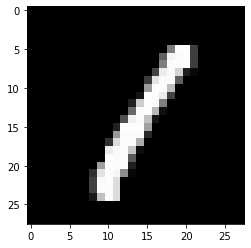

In [ ]:
# 학습 데이터 이미지로 출력해보기
plt.imshow(X_train[3], cmap='gray')

In [ ]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# 학습 데이터 레이블 확인하기
y_train[3]

1

## 3. 기본 딥러닝 프레임 만들기(완전 연결 신경망 dencely connected network)
### 3-1. 데이터 전처리
- (독립변수) 정규화(normalization)

픽셀 값을 255로 나누어 0~1사이의 값을 가지도록 변환하는 것처럼 데이터를 특정 범위로 변환하는 처리를 정규화(normalization)라고 한다. 딥러닝에서는 데이터의 전처리가 매우 중요한데, 실제 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많다. 대표적으로 데이터 전체 평균이 0, 표준편차가 1이 되도록 정규화하는 표준화(standardization)가 있다.

In [ ]:
# 픽셀값 0 ~ 255 를 0 ~ 1 사이의 값으로 정규화
X_train = X_train / 255
X_test = X_test / 255

- (종속변수) 원핫인코딩(one-hot encoding) 

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTvLSynURni0v1cF_weoBFSKkC94cGrOH8yPblJkIP68QjiaN-4" width=200px>



In [ ]:
from keras.utils import to_categorical

# 레이블 0 ~ 9를 원핫인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# 자주 사용되는 값을 변수로 지정
num_classes = y_train.shape[1] # 10
num_pixels = X_train.shape[1]*X_train.shape[2] # 이미지의 가로*세로 크기 = 784(=28*28)

### 3-2. 모델 구성

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# 모델 구성
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(1000, input_dim=num_pixels, activation = 'relu'))
model1.add(Dense(num_classes, activation = 'softmax'))

# 모델 컴파일
model1.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

### 3-3. 모델 학습 모니터링

In [ ]:
# 모델 학습
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=0)

### 3-4. 모델 예측 및 평가

In [ ]:
def loss_graph(history):
  # 손실값 그래프 그리기
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss','Validation Loss'],fontsize=18)
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

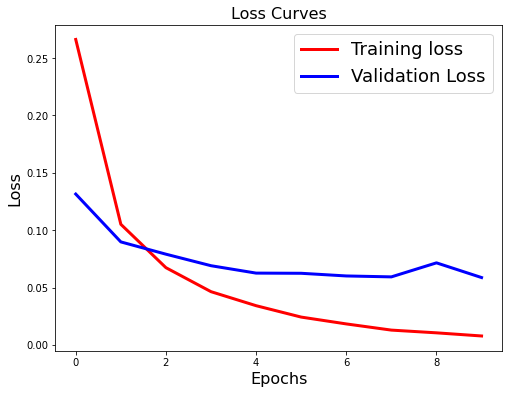

In [ ]:
# 손실값 그래프 그리기
loss_graph(history1)

In [ ]:
# 테스트 데이터로 모델 평가하기위한 함수
def evaluate_model(model):
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("모델 에러율 : %.2f%%" % (100-scores[1]*100))

In [ ]:
# 모델 에러율
evaluate_model(model1)

모델 에러율 : 1.75%


## 4. 이미지 처리에 좋은 성능을 보이는 신경망(CNN, 합성곱 신경망)
### 4-1. 완전 연결 신경망의 문제점
- 완전 연결 신경망은 전역패턴을 학습하기 때문에 같은 모양도 다른 위치에 나타나면 새로운 패턴으로 학습해야 한다.(반면, 현실에서 연필들의 위치가 다르다고 서로 다른건 아니다. 즉, 평행이동으로 움직인 것을 다른 것으로 인식하지 않는다.)
- 완전 연결 신경망에 입력할 때는 데이터를 평평한 1차원 데이터로 평탄화하여 데이터의 공간 구조를 학습할 수 없다.(반면, 현실은 공간 계층 구조를 가진다.)



### 4-2. 합성곱 신경망에서 중요한 2가지
CNN은 심층 신경망에 **합성곱 층(convolution layer)**와 **풀링 층(pooling layer)**이라는 고유의 구조를 더한 인공 신경망이다. 기존의 이미지를 처리하는 인공신경망은 이미지 데이터를 단순히 숫자의 모음으로 인식하여 1차원의 숫자 배열 형태로 주욱 펼쳐 연산하였다. 반면 CNN에는 이미지 데이터를 주입할 때, 이미지가 갖추고 있는 3차원 데이터 구조를 파괴하지 않고 마치 퍼즐들의 모음인 것처럼 전달하여 이미지의 특성을 잘 추출할 수 있도록 돕는다. 

<img src="https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png" width="700px">

- 합성곱 층
  - 지역패턴을 학습하고, 층을 구성함으로써 공간 패턴도 학습
  <img src="https://t1.daumcdn.net/brunch/service/user/4Jol/image/qQKlk9ZC_z3MMTT8aUCCCpnHU-s" width="400px">

  - 커널(kernel), 스트라이드(stride), 패딩(padding)
    - 커널: 이미지를 지역적으로 추출하기 위한 도구
    - 스트라이드: 커널이 움직이는 보폭
    - 패딩: 특징맵이 줄어드는 것을 방지하고 이미지 경계를 표시
<img src="https://i.stack.imgur.com/uEoXw.gif" width="600px">

  - 입력: Conv2D(32, (5, 5), input_shape=X_train.shape[1:], activation='relu')
  - 출력: (height, width, kernels)크기의 3D 텐서
-풀링 층
  - 가중치 개수를 줄이는 방법. 방법론으로 최대풀링(max pooling)과 평균풀링(average pooling) 등이 있다. 
  <img src="https://t1.daumcdn.net/cfile/tistory/993A5B465C4D32D32C" width="400px">

  - 입력: MaxPooling2D(pool_size=(2, 2))
  - 출력: (height, width, kernels)크기의 3D 텐서

### 4-3. 합성곱 층과 풀링 층을 이용한 서브샘플링 전략
- CNN의 목적은 합성곱 연산과 풀링 연산을 반복하며 이미지의 특성을 추출해 나가는 것이다. 
- 가장 일반적인 서브샘플링 전략
  1. 스트라이드가 없는 합성곱으로 조밀한 특성 맵을 만들고 
  2. 그 다음 작은 패치에 대해 최대풀링을 이용한다. 
  3. 충분히 합성곱 연산을 수행하여 이미지의 특성 맵을 추출한다.
  4. 데이터의 차원을 펼쳐 완전연결망에 주입하여 이미지를 분류하는 것이 일반적이다.




In [ ]:
# 학습 데이터 형태 확인
X_train.shape

(60000, 28, 28)

In [ ]:
# Conv2D()의 input_shape=(행, 열, 색상 or 흑백)이므로 채널 차원을 추가하여 데이터의 shape 변환 [samples][width][height][channels]
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 5-1. 모델 구성

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout
# 모델 구성
model2 = Sequential()
model2.add(Conv2D(32, (5,5), input_shape=X_train.shape[1:], activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
# 모델 컴파일
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model2 요약 보기
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

- 드롭아웃(dropout)
  - 과적합 방지 목적
  - 특정 가중치를 무작위로 그리고 일시적으로 학습에서 배제하는 것
  - 특정 가중치가 커지면(과적합됨을 의미) 다른 가중치 학습이 상대적으로 느려지거나 못할 수 있는 것을 방지한다.
  - 
<img src='https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/dropout.jpeg' width=350>
<img src='https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/With_Without_Dropout.png' width=300>


### 5-2. 모델 학습 모니터링

In [ ]:
# 모델 학습
history2 = model2.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

Epoch 1/10
300/300 - 28s - loss: 0.2490 - accuracy: 0.9282 - val_loss: 0.0719 - val_accuracy: 0.9787
Epoch 2/10
300/300 - 28s - loss: 0.0726 - accuracy: 0.9782 - val_loss: 0.0522 - val_accuracy: 0.9832
Epoch 3/10
300/300 - 28s - loss: 0.0528 - accuracy: 0.9844 - val_loss: 0.0400 - val_accuracy: 0.9879
Epoch 4/10
300/300 - 28s - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0382 - val_accuracy: 0.9868
Epoch 5/10
300/300 - 28s - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0409 - val_accuracy: 0.9853
Epoch 6/10
300/300 - 28s - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0363 - val_accuracy: 0.9876
Epoch 7/10
300/300 - 28s - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 8/10
300/300 - 28s - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0329 - val_accuracy: 0.9888
Epoch 9/10
300/300 - 28s - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 10/10
300/300 - 28s - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0302 - val_accura

### 5-3. 모델v2 예측 및 평가

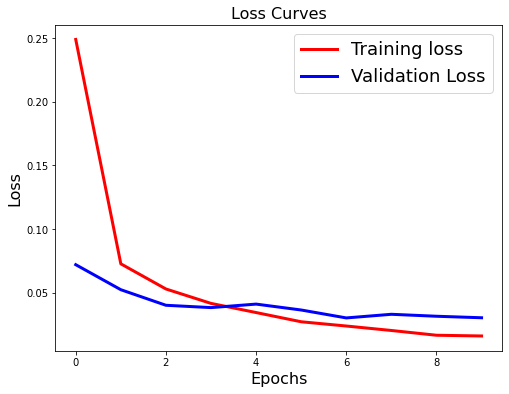

In [ ]:
# 손실값 그래프 그리기
loss_graph(history2)

In [ ]:
# 테스트 데이터로 모델 평가
evaluate_model(model2)

모델 에러율 : 1.01%


<img src='https://k.kakaocdn.net/dn/LKjVe/btqExtbibd4/cyB053kBmX1u1HQmHghjuk/img.png'>

[참고자료] [CNN을 활용한 알고리즘 Case Study-김성훈교수님](https://www.youtube.com/watch?v=KbNbWTnlYXs)

### 5-4. 내 손글씨를 테스트 데이터로 사용하기


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 제목 없음1.png to 제목 없음1.png
Saving 제목 없음2.png to 제목 없음2.png
Saving 제목 없음3.png to 제목 없음3.png
Saving 제목 없음4.png to 제목 없음4.png


In [ ]:
from tensorflow.keras.preprocessing import image

s = image.load_img('제목 없음1.png', target_size=(28, 28), color_mode="grayscale")
s

In [ ]:
# samples 변수에 손글씨 파일명 입력하기
samples = ['제목 없음1.png','제목 없음2.png','제목 없음3.png','제목 없음4.png']

# 내 손글씨 예측하기
for sample in samples:
    s = image.load_img(sample, target_size=(28, 28), color_mode="grayscale")
    img = image.img_to_array(s).astype('float32')
    print(np.argmax(model2.predict(img.reshape(-1,28,28,1))))

5
4
9
7
